## Plotting some early results

In [460]:
# Standard python imports
%matplotlib inline

from os.path import join
import glob
import inspect
from importlib import reload
import warnings

from matplotlib.colors import LogNorm

import numpy as np
import pylab as plt
import pandas as pd

import seaborn as sns

import astropy.io.fits as fits
from astropy.table import Table

from matplotlib import rc

In [251]:


# the following commands make plots look better
def plot_prettier(dpi=200, fontsize=10): 
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    # if you don't have LaTeX installed on your laptop and this statement 
    # generates error, comment it out
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    rc('text', usetex=True)
    
plot_prettier()

In [252]:
def read_fits_table(filename):
    '''
    reads and returns data in a table from a FITS file
    '''
    hdu = fits.open(filename)
    data = Table(hdu[1].data)   # second index of the hdu corresponds to the data in my astropy table files
    hdu.close()
    
    return data

def read_fits_image(filename):
    '''
    reads and returns an image from a FITS file
    '''
    hdu = fits.open(filename)
    data = hdu[0].data
    header = hdu[0].header 
    hdu.close()
    
    return data

In [435]:
# get table of redmagic data
des_data = read_fits_table('/Users/aidan/Desktop/sl_project/results/redmagic_4kqf_test.fits')

des_se_data_all = pd.read_csv('/Users/aidan/Desktop/sl_project/catalogs/redmagic_my10k_dr2.csv')#[:4000]

des_se_data = pd.read_csv('/Users/aidan/Desktop/sl_project/catalogs/redmagic_my10k_dr2.csv')[:4000]
des_se_data_flux = pd.read_csv('/Users/aidan/Desktop/sl_project/catalogs/redmagic_my10k_dr2_flux.csv')[:4000]
des_se_data_mag = pd.read_csv('/Users/aidan/Desktop/sl_project/catalogs/redmagic_my10k_dr2_mag.csv')[:4000]

sl_data98 = read_fits_table('/Users/aidan/Desktop/sl_project/results/fitting_98lenses_test.fits')
sl_se_data98 = pd.read_csv('/Users/aidan/Desktop/sl_project/catalogs/jacobs2019_aidan_cut_dr2.csv')

sl_data505 = pd.read_csv('/Users/aidan/Desktop/sl_project/catalogs/jacobs2019_dr2.csv')

sl_data505_mag = pd.read_csv('/Users/aidan/Desktop/sl_project/catalogs/jacobs2019_table1_dr2_mag.csv')

In [459]:
len(des_nr)

3990

(array([0.16683669, 0.        , 0.25025504, 0.58392842, 0.75076511,
        1.58494857, 1.83520361, 1.41811188, 1.25127519, 0.33367338]),
 array([0.5485807 , 0.67090489, 0.79322908, 0.91555327, 1.03787746,
        1.16020165, 1.28252584, 1.40485003, 1.52717422, 1.64949841,
        1.7718226 ]),
 <a list of 10 Patch objects>)

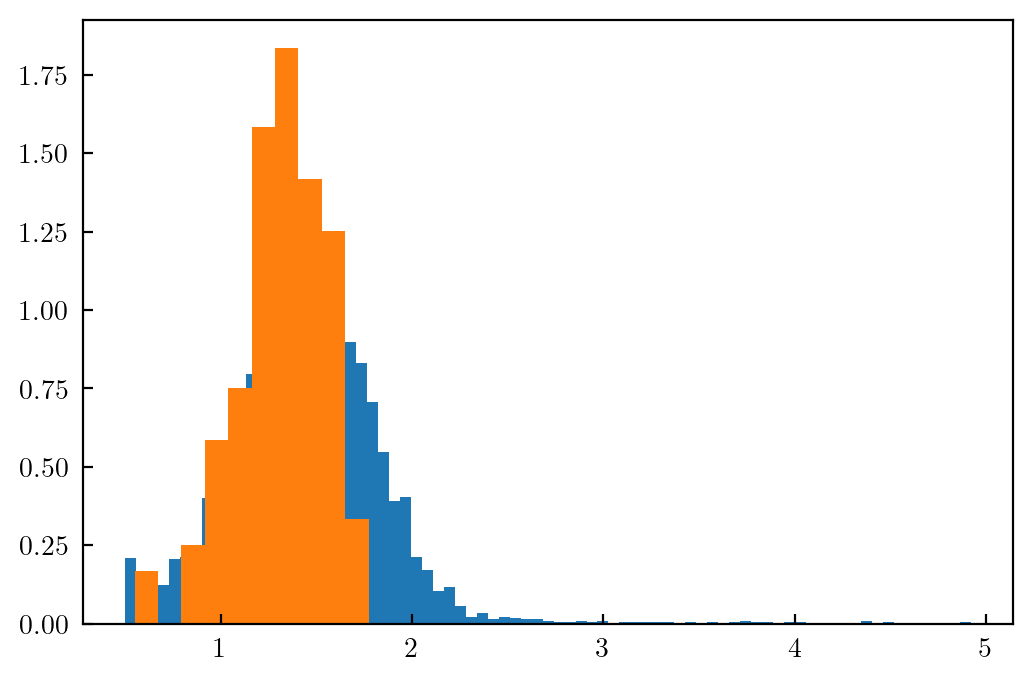

In [456]:
#sl_data98['flux_r'], 
plt.hist(des_data['nr'], bins='auto', density=True)
plt.hist(sl_data98['nr'], bins='auto', density=True)

#plt.xlim(0, 20)

In [453]:
from scipy.stats import ks_2samp

ks_2samp(des_data['Rr'], sl_data98['Rr'])

Ks_2sampResult(statistic=0.5298979591836734, pvalue=0.0)

In [339]:
# DES magnitudes
des_r = des_data['mag_r']
des_g = des_data['mag_g']

sl98_r = sl_data98['mag_r']
sl98_g = sl_data98['mag_g']

sl505_r = sl_data505_mag['mag_aper_4_r']
sl505_g = sl_data505_mag['mag_aper_4_g']

# DES colors
des_gr = des_g - des_r
sl98_gr = sl98_g - sl98_r
sl505_gr = sl505_g - sl505_r

In [458]:
des_filt = (np.isfinite(des_r) & np.isfinite(des_g) & np.isfinite(des_gr))
des_r_filt = des_r[des_filt]
des_g_filt = des_g[des_filt]
des_gr_filt = des_gr[des_filt]

des_ellip_filt = des_data['er'][des_filt]

# DES Sersic photometry parameters

plate_scale = 0.263                                 # arcsec per pixel

des_nr = des_data['nr'][des_filt]                   # Sersic index
des_rr = des_data['Rr'][des_filt] * plate_scale     # half-light radius (in arcsec)
des_ng = des_data['ng'][des_filt]
des_rg = des_data['Rg'][des_filt] * plate_scale

sl_nr = sl_data98['nr']                               # Sersic index
sl_rr = sl_data98['Rr'] * plate_scale                 # half-light radius (in arcsec)
sl_ng = sl_data98['ng']
sl_rg = sl_data98['Rg'] * plate_scale

sl_ellip = sl_data98['er']

# residual flux values
# this still needs to be scaled with uncertainty, which I need to implement a calculation for

des_resflux_r = (des_data['obs_flux_35pm3_r'] - des_data['mod_flux_35pm3_r']) / des_data['mod_flux_35pm3_err_r']
des_resflux_g = (des_data['obs_flux_35pm3_g'] - des_data['mod_flux_35pm3_g']) / des_data['mod_flux_35pm3_err_r']

sl_resflux_r = (sl_data98['obs_flux_35pm3_r'] - sl_data98['mod_flux_35pm3_r']) #/ sl_data98['mod_flux_35pm3_err_r']
sl_resflux_g = (sl_data98['obs_flux_35pm3_g'] - sl_data98['mod_flux_35pm3_g']) #/ sl_data98['mod_flux_35pm3_err_g']


/Users/aidan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/Users/aidan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


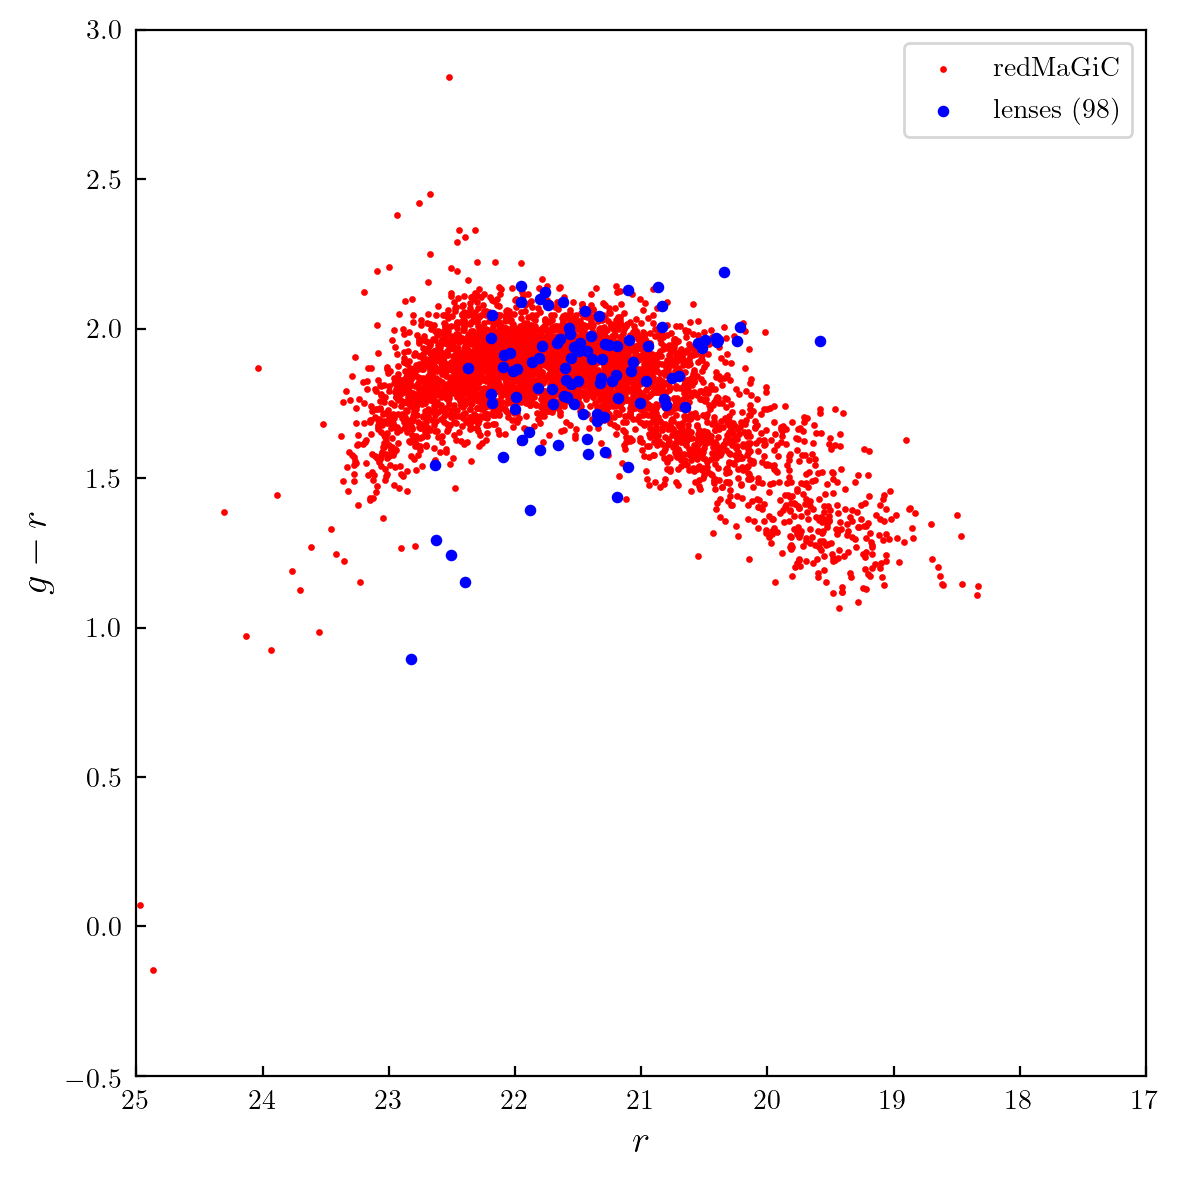

In [341]:
plt.figure(figsize=(6,6))
#plt.hist2d(sdss_r_lowz, sdss_color_lowz, bins=650, norm=LogNorm())
plt.scatter(des_r_filt, des_gr_filt, s=2 
            #, bins=100
            , c='r', label='redMaGiC'
           #, norm=LogNorm()
        )
plt.scatter(sl98_r, sl98_gr, s=10 
            #, bins=100
            , c='b', label='lenses ({})'.format(len(sl98_r))
           #, norm=LogNorm()
        )
#plt.scatter(des_g_filt, des_gr_filt, s=3, c='g')
plt.xlabel(r'$r$', fontsize=14)
plt.ylabel(r'$g-r$', fontsize=14)
plt.legend(loc='upper right')

plt.xlim(17, 25)
plt.ylim(-0.5,3)

plt.gca().invert_xaxis()

plt.tight_layout()

plt.savefig('../basic_cmd.jpg', format='jpeg')

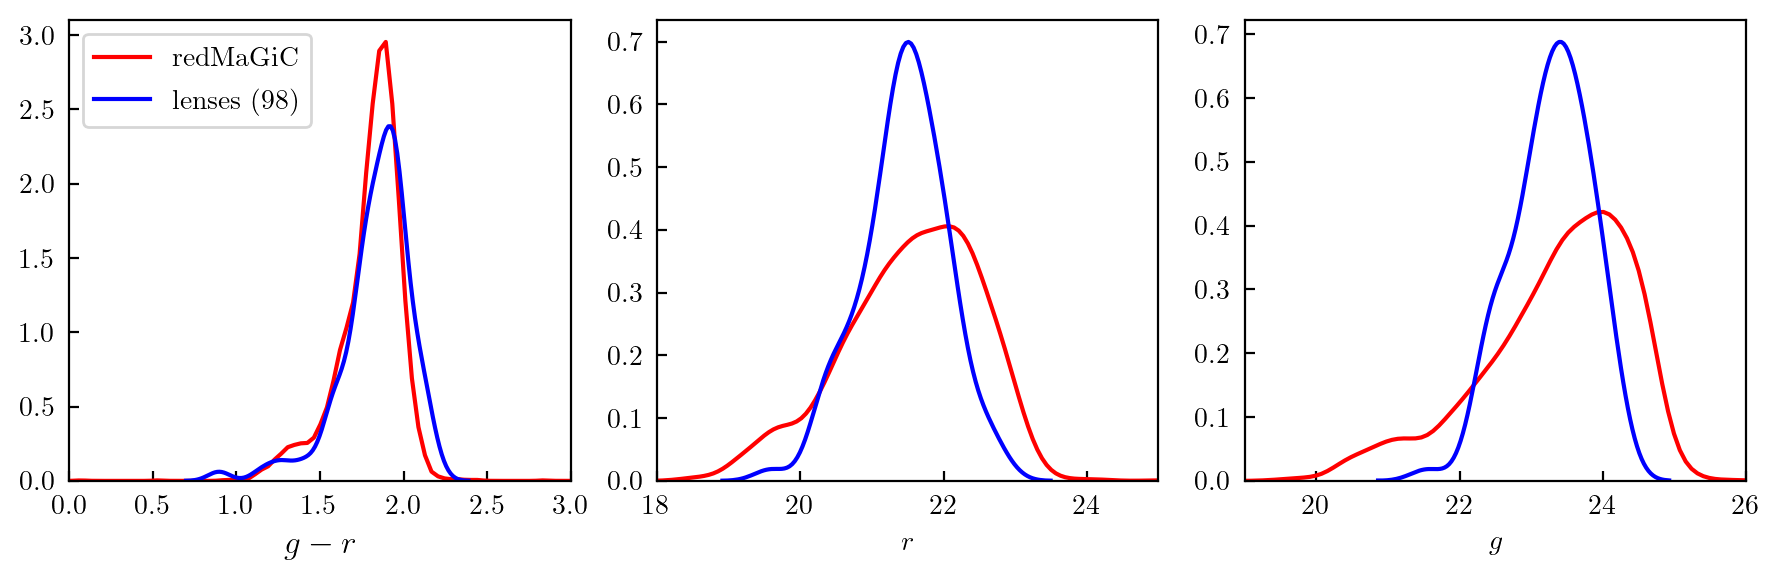

In [418]:
fig, (cplot98, magrplot98, maggplot98) = plt.subplots(1,3, figsize=(9,3))

sns.kdeplot(des_gr_filt, ax = cplot98, color='r', label='redMaGiC')
sns.kdeplot(sl98_gr, ax = cplot98, color='b', label='lenses ({})'.format(len(sl_data98)))
cplot98.legend(loc='upper left', fontsize=10)
cplot98.set_xlabel(r'$g-r$', fontsize=12)
cplot98.set_xlim(0,3)

sns.kdeplot(des_r_filt, ax = magrplot98, color='r')
sns.kdeplot(sl98_r, ax = magrplot98, color='b')
magrplot98.legend([],[], frameon=False)
magrplot98.set_xlabel(r'$r$')
magrplot98.set_xlim(18,25)

sns.kdeplot(des_g_filt, ax = maggplot98, color='r')
sns.kdeplot(sl98_g, ax = maggplot98, color='b')
maggplot98.legend([],[], frameon=False)
maggplot98.set_xlabel(r'$g$')
maggplot98.set_xlim(19,26)

plt.tight_layout()

plt.savefig('../color_mag_hists_aidan.png', format='png')

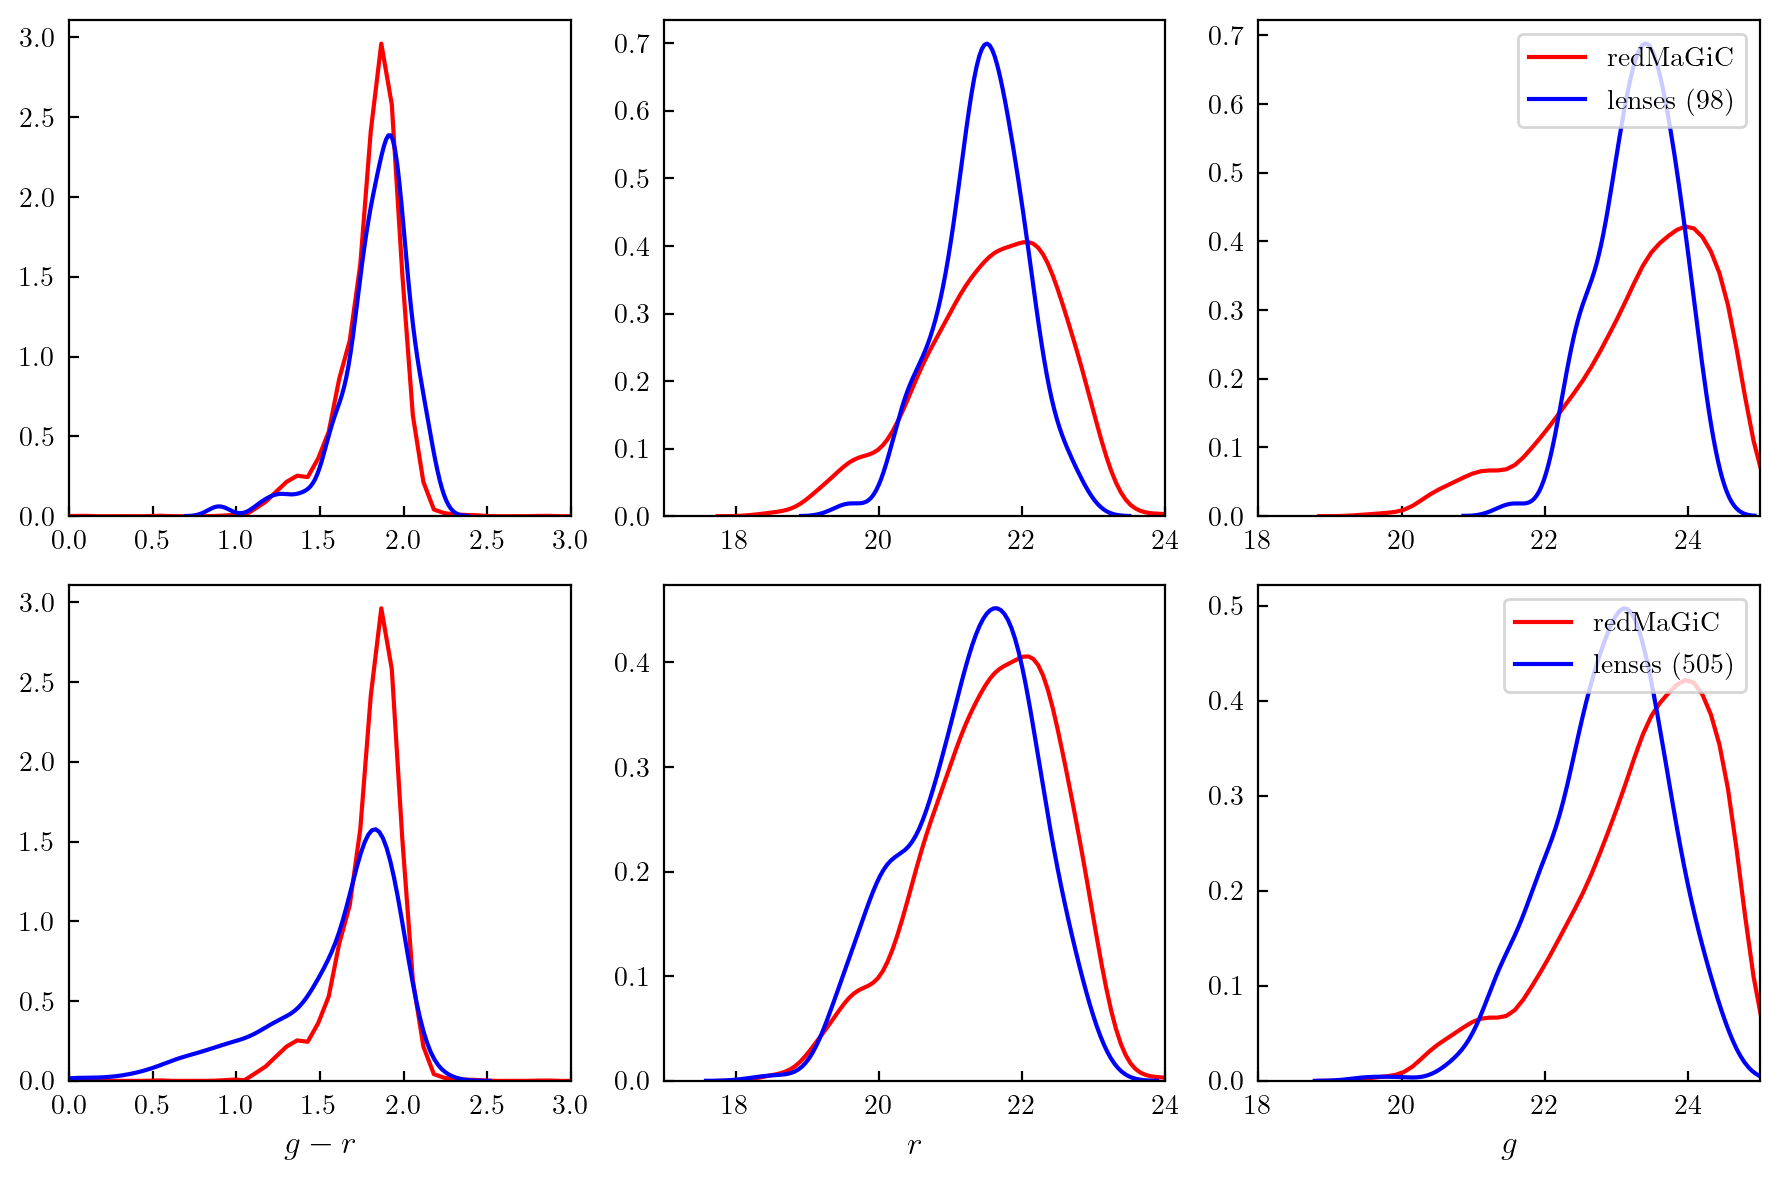

In [343]:
fig, ((cplot98, magrplot98, maggplot98), (cplot505, magrplot505, maggplot505)) = plt.subplots(2,3, figsize=(9,6))

sns.kdeplot(des_gr_filt, ax = cplot98, color='r')
sns.kdeplot(sl98_gr, ax = cplot98, color='b')
cplot98.legend([],[], frameon=False)
cplot98.set_xlim(0,3)

sns.kdeplot(des_r_filt, ax = magrplot98, color='r')
sns.kdeplot(sl98_r, ax = magrplot98, color='b')
magrplot98.legend([],[], frameon=False)
#magrplot.set_xlabel(r'$r$')
magrplot98.set_xlim(17,24)

sns.kdeplot(des_g_filt, ax = maggplot98, color='r', label='redMaGiC')
sns.kdeplot(sl98_g, ax = maggplot98, color='b', label='lenses ({})'.format(len(sl_data98)))
maggplot98.legend(loc='upper right', fontsize=10)
#magrplot.set_xlabel(r'$r$')
maggplot98.set_xlim(18,25)

sns.kdeplot(des_gr_filt, ax = cplot505, color='r')
sns.kdeplot(sl505_gr, ax = cplot505, color='b')
cplot505.legend([],[], frameon=False)
cplot505.set_xlabel(r'$g-r$', fontsize=12)
cplot505.set_xlim(0,3)

sns.kdeplot(des_r_filt, ax = magrplot505, color='r')
sns.kdeplot(sl505_r, ax = magrplot505, color='b')
magrplot505.legend([],[], frameon=False)
magrplot505.set_xlabel(r'$r$', fontsize=12)
magrplot505.set_xlim(17,24)

sns.kdeplot(des_g_filt, ax = maggplot505, color='r', label='redMaGiC')
sns.kdeplot(sl505_g, ax = maggplot505, color='b', label='lenses ({})'.format(len(sl_data505)))
maggplot505.legend(loc='upper right', fontsize=10)
maggplot505.set_xlabel(r'$g$', fontsize=12)
maggplot505.set_xlim(18,25)

plt.tight_layout()

plt.savefig('../color_mag_hists_se.png', format='png')

#nplot.set_xlim(0,15)

Below is a plot of r and g band magnitude differences between my measurements and SExtractor's.

In [400]:
des_filt = (np.isfinite(des_r) & np.isfinite(des_g) #& np.isfinite(des_gr) 
            & np.isfinite(des_se_data_mag['mag_aper_4_r']) & np.isfinite(des_se_data_mag['mag_aper_4_g']))
des_r_filt = des_r[des_filt]
des_g_filt = des_g[des_filt]
des_gr_filt = des_gr[des_filt]

des_se_r = des_se_data_mag['mag_aper_4_r'][des_filt]
des_se_g = des_se_data_mag['mag_aper_4_g'][des_filt]
des_se_gr = des_se_g - des_se_r

des_resr = des_se_r - des_r_filt
des_resg = des_se_g - des_g_filt
des_resgr = des_se_gr - des_gr_filt

sl98_se_mag = pd.read_csv('../catalogs/jacobs2019_aidan_cut_dr2_mag.csv')
sl_data98 = read_fits_table('/Users/aidan/Desktop/sl_project/results/fitting_98lenses_test.fits')

sl98_r = sl_data98['mag_r']
sl98_g = sl_data98['mag_g']
sl98_gr = sl98_g - sl98_r

sl98_se_r = sl98_se_mag['mag_aper_4_r']
sl98_se_g = sl98_se_mag['mag_aper_4_g']
sl98_se_gr = sl98_se_g - sl98_se_r

sl98_resr = sl98_se_r - sl98_r
sl98_resg = sl98_se_g - sl98_g
sl98_resgr = sl98_se_gr - sl98_gr

(2595,)


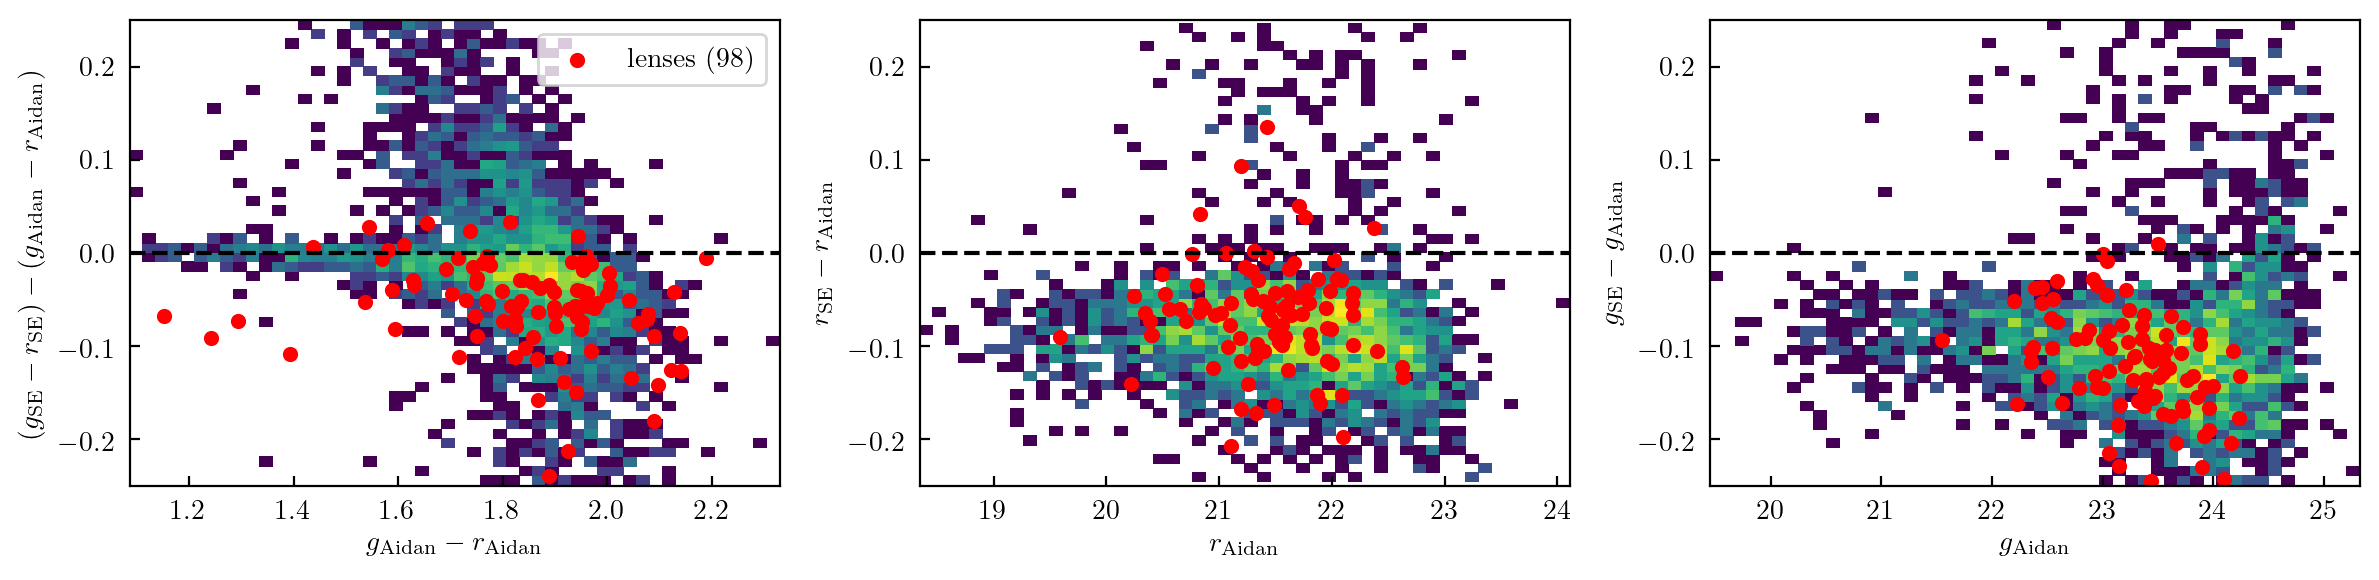

In [434]:
fig, (resgr, resr, resg) = plt.subplots(1,3, figsize=(12,3))

resr.hist2d(des_r_filt[(des_resr < 0.25) & (des_resr > -0.25)]
            , des_resr[(des_resr < 0.25) & (des_resr > -0.25)]
            , bins=50, norm=LogNorm()
             #, s=1, color='red'
         )
resr.scatter(sl98_r, sl98_resr#, bins='auto'
             , s=20, color='red'
         )

resg.hist2d(des_g_filt[(des_resg < 0.25) & (des_resg > -0.25)]
            , des_resg[(des_resg < 0.25) & (des_resg > -0.25)]
            , bins=50, norm=LogNorm()
             #, s=1, color='red'
         )
resg.scatter(sl98_g, sl98_resg#, bins='auto'
             , s=20, color='red'
        )

resgr.hist2d(des_gr_filt[(des_resgr < 0.25) & (des_resgr > -0.25)]
             , des_resgr[(des_resgr < 0.25) & (des_resgr > -0.25)]
             , bins=50, norm=LogNorm()
             #, s=1, color='red'
         )
resgr.scatter(sl98_gr, sl98_resgr#, bins='auto'
              , s=20, color='red', label = 'lenses ({})'.format(len(sl_data98))
          )

# label these a bit better

resgr.legend(loc = 'upper right')

resgr.set_xlabel(r'$g_{\rm Aidan} - r_{\rm Aidan}$')
resr.set_xlabel(r'$r_{\rm Aidan}$')
resg.set_xlabel(r'$g_{\rm Aidan}$')

resgr.set_ylabel(r'$(g_{\rm SE} - r_{\rm SE}) - (g_{\rm Aidan} - r_{\rm Aidan})$')
resr.set_ylabel(r'$r_{\rm SE} - r_{\rm Aidan}$')
resg.set_ylabel(r'$g_{\rm SE} - g_{\rm Aidan}$')

resr.axhline(0, color='black', ls='--')
resg.axhline(0, color='black', ls='--')
resgr.axhline(0, color='black', ls='--')

lim = 0.25

resr.set_ylim(-1 * lim, lim)
resg.set_ylim(-1 * lim, lim)
resgr.set_ylim(-1 * lim, lim)

plt.tight_layout()

plt.savefig('../mag_measurements_bad.jpg', format='jpeg')

# how does this look for redmagic galaxies? make the same measurements and find out


Below is a plot of observed aperture flux (in thousands of counts per second) against residual aperture flux (observed minus model flux). These fluxes were calculated by placing a 1.841" by 1.841" box around the center of a cutout and calculating the total pixel counts in the box.

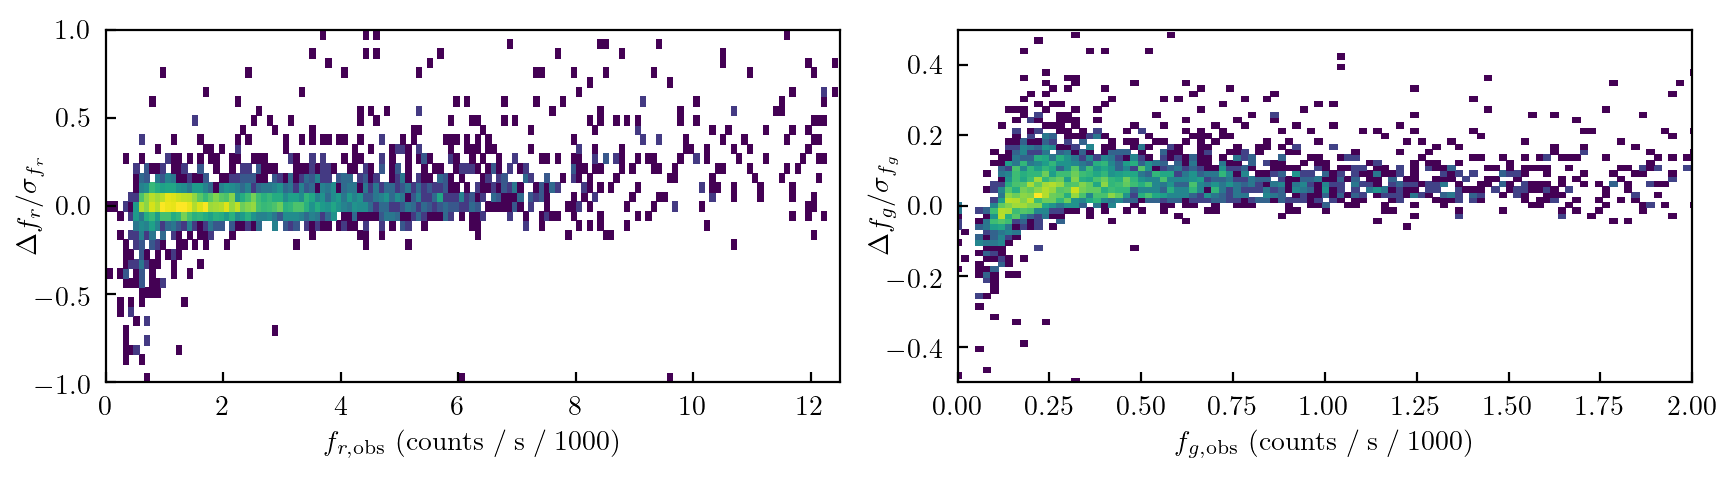

In [346]:
# for a sample of 4000 redmagic galaxies

fig, (resr, resg) = plt.subplots(1,2, figsize=(8.75,2.5))

'''
filtr = (-120 < sl_resflux_r) & (sl_resflux_r < 120) & (sl_data['obs_flux_35pm3_r'] < 16000)
filtg = (-120 < sl_resflux_g) & (sl_resflux_g  < 120) & (sl_data['obs_flux_35pm3_g'] < 2500)

resr.hist2d(sl_data['obs_flux_35pm3_r'][filtr] / 1000
            , sl_resflux_r[filtr]
            , bins=10, cmap='viridis', norm=LogNorm()
           )
resg.hist2d(sl_data['obs_flux_35pm3_g'][filtg] / 1000
            , sl_resflux_g[filtg]
            , bins=10, cmap='viridis', norm=LogNorm()
           )'''


filtr = (des_resflux_r < 1) & (des_data['obs_flux_35pm3_r'] < 16000) & np.invert(np.isnan(des_resflux_r)) & np.isfinite(des_resflux_r)
filtg = (des_resflux_g < 0.5) & (des_data['obs_flux_35pm3_g'] < 2500) & np.invert(np.isnan(des_resflux_g)) & np.isfinite(des_resflux_g)

resr.hist2d(des_data['obs_flux_35pm3_r'][filtr] / 1000
            , des_resflux_r[filtr], bins=175, cmap='viridis', norm=LogNorm()
           )
resg.hist2d(des_data['obs_flux_35pm3_g'][filtg] / 1000
            , des_resflux_g[filtg], bins=125, cmap='viridis', norm=LogNorm()
           )
           

resr.set_xlim(0, 12.5)
resg.set_xlim(0, 2)

resr.set_ylim(-1, 1)
resg.set_ylim(-0.5, 0.5)

resr.set_xlabel(r'$f_{r,\rm{obs}}$ (counts $/\;\rm{s}\;/\;1000$)')
resr.set_ylabel(r'$\Delta f_{r}  / \sigma_{f_r}$', labelpad=-5)

resg.set_xlabel(r'$f_{g,\rm{obs}}$ (counts $/\;\rm{s}\;/\;1000$)')
resg.set_ylabel(r'$\Delta f_{g}  / \sigma_{f_g}$', labelpad=-5)

plt.tight_layout()

fig.savefig('../flux_bias.jpg', format='jpeg')

#fig.savefig('/home/acloonan/ASTR285s22/projects/acloonan/first_fig.jpg', format='jpeg')

In [347]:
np.invert(np.isnan(des_resflux_r))

array([ True,  True,  True, ...,  True,  True,  True])

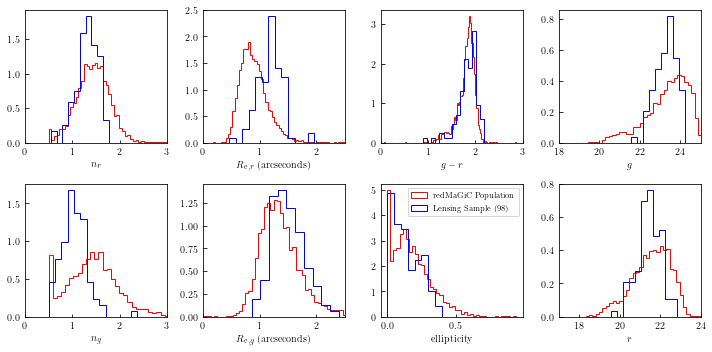

In [471]:
fig, ((nrplot, rrplot, grplot, gplot), (ngplot, rgplot, eplot, rplot)) = plt.subplots(2,4, figsize=(10,5))

nrplot.hist(des_nr#, des_rr
            , color='r', bins='auto', density=True, histtype='step', label='redMaGiC Population'
            #, s=3, c='r'
        )

nrplot.hist(sl_nr#, des_rr
            , color='b', bins='auto', density=True, histtype='step', label='Lensing Sample ({})'.format(len(sl_data98))
            #, s=3, c='r'
        )

nrplot.set_xlabel(r'$n_r$')
nrplot.set_xlim(0,3)

rrplot.hist(des_rr#, des_rr
            , color='r', bins='auto', density=True, histtype='step', label='redMaGiC Population'
            #, s=3, c='r'
        )

rrplot.hist(sl_rr#, des_rr
            , color='b', bins='auto', density=True, histtype='step', label='Lensing Sample ({})'.format(len(sl_data98))
            #, s=3, c='r'
        )

rrplot.set_xlabel(r'$R_{{\rm e},r}$ (arcseconds)')
rrplot.set_xlim(0,2.5)

ngplot.hist(des_ng#, des_rr
            , color='r', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
        )

ngplot.hist(sl_ng#, des_rr
            , color='b', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
        )

ngplot.set_xlabel(r'$n_g$')
ngplot.set_xlim(0,3)

rgplot.hist(des_rg#, des_rr
            , color='r', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
        )

rgplot.hist(sl_rg#, des_rr
            , color='b', bins='auto', density=True, histtype='step'
            #, s=3, c='r'
        )

rgplot.set_xlabel(r'$R_{{\rm e},g}$ (arcseconds)')
rgplot.set_xlim(0,2.5)

eplot.hist(des_ellip_filt#, des_rr
            , color='r', bins='auto', density=True, histtype='step', label='redMaGiC Population'
            #, s=3, c='r'
        )

eplot.hist(sl_ellip#, des_rr
            , color='b', bins='auto', density=True, histtype='step', label='Lensing Sample ({})'.format(len(sl_data98))
            #, s=3, c='r'
        )
eplot.set_xlabel('ellipticity')
eplot.legend(loc='upper right', fontsize=8)

grplot.hist(des_gr_filt#, des_rr
            , color='r', bins='auto', density=True, histtype='step', label='redMaGiC Population'
            #, s=3, c='r'
        )

grplot.hist(sl98_gr#, des_rr
            , color='b', bins='auto', density=True, histtype='step', label='Lensing Sample ({})'.format(len(sl_data98))
            #, s=3, c='r'
        )
grplot.set_xlabel(r'$g-r$')
grplot.set_xlim(0,3)

gplot.hist(des_g_filt#, des_rr
            , color='r', bins='auto', density=True, histtype='step', label='redMaGiC Population'
            #, s=3, c='r'
        )

gplot.hist(sl98_g
            , color='b', bins='auto', density=True, histtype='step', label='Lensing Sample ({})'.format(len(sl_data98))
            #, s=3, c='r'
        )
gplot.set_xlabel(r'$g$')
gplot.set_xlim(18,25)

rplot.hist(des_r_filt#, des_rr
            , color='r', bins='auto', density=True, histtype='step', label='redMaGiC Population'
            #, s=3, c='r'
        )

rplot.hist(sl98_r#, des_rr
            , color='b', bins='auto', density=True, histtype='step', label='Lensing Sample ({})'.format(len(sl_data98))
            #, s=3, c='r'
        )
rplot.set_xlabel(r'$r$')
rplot.set_xlim(17,24)

plt.tight_layout()

fig.savefig('../all_obs.jpg', bbox_inches='tight', format='jpeg')

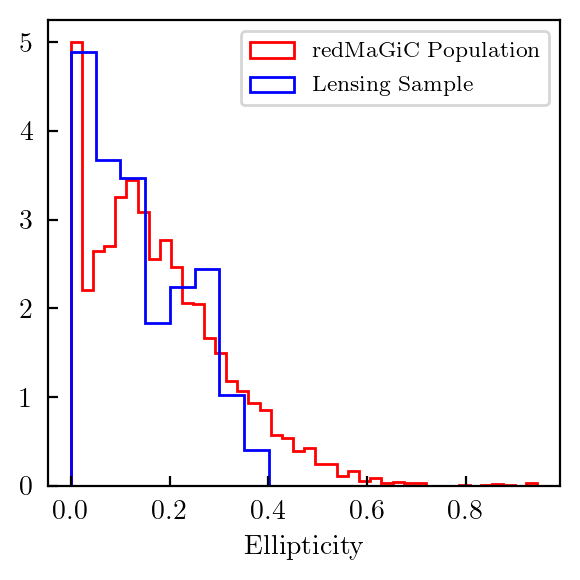

In [349]:
fig, eplot = plt.subplots(1,1, figsize=(3,3))

eplot.hist(des_ellip_filt#, des_rr
            , color='r', bins='auto', density=True, histtype='step', label='redMaGiC Population'
            #, s=3, c='r'
        )

eplot.hist(sl_ellip#, des_rr
            , color='b', bins='auto', density=True, histtype='step', label='Lensing Sample'
            #, s=3, c='r'
        )

eplot.legend(loc='upper right', fontsize=8)

eplot.set_xlabel('Ellipticity', fontsize=10)

plt.tight_layout()

fig.savefig('../ellip_dist.jpg', format='jpeg')